<a href="https://colab.research.google.com/github/katsuhiro-wq/katsuhiro-wq/blob/sub1/dbipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-668dade20631>:16: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(rms)


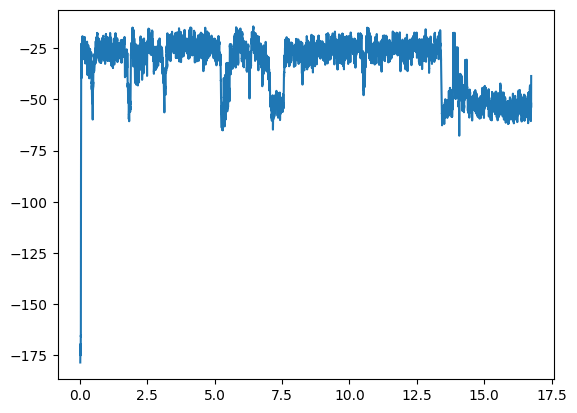

In [3]:
!pip install soundfile # install the soundfile if you haven't
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

# Instead of using wave, use soundfile to open the audio file
x, sr = sf.read("filtered_audio.wav")

# The rest of your code remains mostly the same,
# but you might need to adjust based on the sample rate (sr) returned by soundfile.

def to_db(x, N):
    pad = np.zeros(N//2)
    pad_data = np.concatenate([pad, x, pad])
    rms = np.array([np.sqrt((1/N) * (np.sum(pad_data[i:i+N]))**2) for i in range(len(x))])
    return 20 * np.log10(rms)

N = 1024
db = to_db(x, N)

# sr is now obtained from sf.read
t = np.arange(0, db.shape[0]/sr, 1/sr)

def smoothing(input, window):
    output = []
    for i in range(input.shape[0]):
        if i < window:
            output.append(np.mean(input[:i+window+1]))
        elif i > input.shape[0] - 1 - window:
            output.append(np.mean(input[i:]))
        else:
            output.append(np.mean(input[i-window:i+window+1]))
    return np.array(output)

smoothed_db = smoothing(db, 100)

plt.plot(t, smoothed_db, label='signal')
plt.savefig('va_db.png', dpi=300)
plt.show()